<a href="https://colab.research.google.com/github/kaisardauletbek/Learning-NLP/blob/main/OwnRNN(rusnames_quotes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Samsung-IT-Academy/stepik-dl-nlp.git && pip install -r stepik-dl-nlp/requirements.txt
import sys; sys.path.append('./stepik-dl-nlp')

Cloning into 'stepik-dl-nlp'...
remote: Enumerating objects: 289, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 289 (delta 10), reused 14 (delta 6), pack-reused 266
Receiving objects: 100% (289/289), 42.27 MiB | 24.40 MiB/s, done.
Resolving deltas: 100% (139/139), done.
     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 1.7MB 38.8MB/s 
     |████████████████████████████████| 24.2MB 113kB/s 
     |████████████████████████████████| 307kB 42.3MB/s 
     |████████████████████████████████| 8.2MB 45.2MB/s 
  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=c0bd1ad2af82986b70b907e4b1195840763d1204898cb81ffa3ea5f6a7b765c2
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
  Created wheel for ufal.udpipe: filename=ufal.udpipe-1.2.0.3-cp37-cp37m-linux_x86_64.whl size=5626539 sha256=bfcaa76a7ae938bd9f371

In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with open('./stepik-dl-nlp/datasets/author_quotes.txt') as input_file:
    quotes = input_file.read()[:-1].split('\n')
    quotes = [' ' + line for line in quotes]

In [4]:
quotes[:5]

[' If you live to be a hundred, I want to live to be a hundred minus one day so I never have to live without you.',
 " Promise me you'll always remember: You're braver than you believe, and stronger than you seem, and smarter than you think.",
 ' Did you ever stop to think, and forget to start again?',
 ' Organizing is what you do before you do something, so that when you do it, it is not all mixed up.',
 ' Weeds are flowers too, once you get to know them.']

(array([3.209e+03, 9.599e+03, 7.905e+03, 5.462e+03, 4.113e+03, 2.755e+03,
        1.797e+03, 9.670e+02, 3.510e+02, 7.000e+00]),
 array([ 10. ,  49.9,  89.8, 129.7, 169.6, 209.5, 249.4, 289.3, 329.2,
        369.1, 409. ]),
 <a list of 10 Patch objects>)

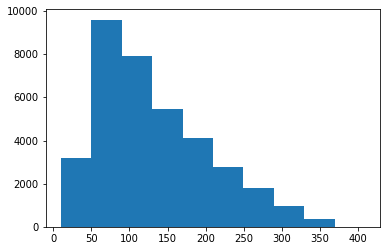

In [5]:
plt.hist(list(map(len,quotes)))

In [6]:
tokens = list(set(''.join(quotes)))

num_tokens = len(tokens)
print(num_tokens)

85


In [7]:
token_to_id = {token: idx for idx, token in enumerate(tokens)}
token_to_id

{' ': 31,
 '!': 67,
 '"': 3,
 '#': 83,
 '$': 16,
 '%': 62,
 '&': 7,
 "'": 80,
 '(': 22,
 ')': 8,
 '*': 70,
 '+': 17,
 ',': 37,
 '-': 47,
 '.': 76,
 '/': 42,
 '0': 29,
 '1': 20,
 '2': 56,
 '3': 12,
 '4': 74,
 '5': 25,
 '6': 79,
 '7': 81,
 '8': 18,
 '9': 14,
 ':': 50,
 ';': 13,
 '=': 52,
 '?': 65,
 'A': 28,
 'B': 46,
 'C': 72,
 'D': 43,
 'E': 78,
 'F': 55,
 'G': 45,
 'H': 39,
 'I': 36,
 'J': 57,
 'K': 61,
 'L': 40,
 'M': 77,
 'N': 82,
 'O': 15,
 'P': 49,
 'Q': 24,
 'R': 2,
 'S': 21,
 'T': 38,
 'U': 26,
 'V': 5,
 'W': 75,
 'X': 51,
 'Y': 73,
 'Z': 33,
 'a': 53,
 'b': 84,
 'c': 63,
 'd': 6,
 'e': 64,
 'f': 66,
 'g': 34,
 'h': 19,
 'i': 41,
 'j': 54,
 'k': 23,
 'l': 48,
 'm': 69,
 'n': 0,
 'o': 9,
 'p': 44,
 'q': 60,
 'r': 11,
 's': 1,
 't': 30,
 'u': 71,
 'v': 4,
 'w': 32,
 'x': 58,
 'y': 68,
 'z': 10,
 '£': 35,
 '—': 27,
 '’': 59}

In [8]:
assert len(tokens) == len(token_to_id), "dictionaries must have same size"

for i in range(num_tokens):
    assert token_to_id[tokens[i]] == i, "token identifier must be it's position in tokens list"

print("Seems alright!")

Seems alright!


In [9]:
def to_matrix(data, token_dict, max_len = None, dtype = 'int32', batch_first = True):
  max_len = max_len or max(map(len, data))
  data_ix = np.zeros([len(data), max_len], dtype) + token_dict[' ']
  
  for i in range(len(data)):
    line_ix = [token_dict[c] for c in data[i]]
    data_ix[i, : len(line_ix)] = line_ix
  if not batch_first:
    data_ix = np.transpose(data_ix)

  return data_ix


In [11]:
print('\n'.join(quotes[::2000]))
print(to_matrix(quotes[::2000], token_to_id))

 If you live to be a hundred, I want to live to be a hundred minus one day so I never have to live without you.
 In the beginning, everybody that gets to work with me, thinks I'm nice. But three weeks later, they hear a bell ringing. Then they realise I meant everything I said during that first week. It's not my fault people are not taking me serious from the first moment.
 I tend to get comfortable with the dialogue and find out who the person is in the script and try to hit that. People are sort of independent of their occupations and their pastimes. You don't play a politician or a fireman or a cowboy - you just play a person.
 'Tis love that makes the world go round, my baby.
 Some of these kids just don't plain know how good they are: how smart and how much they have to say. You can tell them. You can shine that light on them, one human interaction at a time.
 I was able to realize that I definitely want to make sure that I use my voice, as it gets bigger and bigger, in the world 

### BUILDING NEURAL NET

In [12]:
import torch, torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import random

In [15]:
class CharRNNCell(nn.Module):
    """
    Implement the scheme above as torch module
    """
    def __init__(self, num_tokens=len(tokens), embedding_size=16, rnn_num_units=64):
        super(self.__class__,self).__init__()
        self.num_units = rnn_num_units
        
        self.embedding = nn.Embedding(num_tokens, embedding_size)
        self.rnn_update = nn.Linear(embedding_size + rnn_num_units, rnn_num_units)
        self.rnn_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x, h_prev):
        """
        This method computes h_next(x, h_prev) and log P(x_next | h_next)
        We'll call it repeatedly to produce the whole sequence.
        
        :param x: batch of character ids, variable containing vector of int64
        :param h_prev: previous rnn hidden states, variable containing matrix [batch, rnn_num_units] of float32
        """
        # get vector embedding of x
        x_emb = self.embedding(x)
        
        # compute next hidden state using self.rnn_update
        x_and_h = torch.cat([x_emb, h_prev], dim=1) #YOUR CODE HERE
        h_next = self.rnn_update(x_and_h) #YOUR CODE HERE
        
        h_next = F.tanh(h_next)
        
        assert h_next.size() == h_prev.size()
        
        #compute logits for next character probs
        logits = self.rnn_to_logits(h_next)
        
        return h_next, F.log_softmax(logits, -1)
    
    def initial_state(self, batch_size):
        """ return rnn state before it processes first input (aka h0) """
        return Variable(torch.zeros(batch_size, self.num_units))

char_rnn = CharRNNCell()

In [16]:
def rnn_loop(rnn, batch_index):
    """
    Computes log P(next_character) for all time-steps in names_ix
    :param names_ix: an int32 matrix of shape [batch, time], output of to_matrix(names)
    """
    batch_size, max_length = batch_index.size()
    hid_state = rnn.initial_state(batch_size)
    logprobs = []

    for x_t in batch_index.transpose(0,1):
        hid_state, logp_next = rnn(x_t, hid_state)  
        logprobs.append(logp_next)
        
    return torch.stack(logprobs, dim=1)

In [17]:
from IPython.display import clear_output
from random import sample

char_rnn = CharRNNCell()
opt = torch.optim.Adam(char_rnn.parameters())
history = []

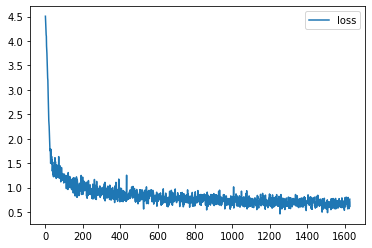

In [21]:
MAX_LENGTH = max(map(len, quotes))

for i in range(1000):
    batch_ix = to_matrix(sample(quotes, 32), token_to_id, max_len=MAX_LENGTH)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)
    
    logp_seq = rnn_loop(char_rnn, batch_ix)
    
    # compute loss
    predictions_logp = logp_seq[:, :-1]
    actual_next_tokens = batch_ix[:, 1:]

    loss = -torch.mean(torch.gather(predictions_logp, dim=2, index=actual_next_tokens[:,:,None]))###YOUR CODE
    
    # train with backprop
    loss.backward()
    opt.step()
    opt.zero_grad()
    
    # visualizing training process
    history.append(loss.data.numpy())
    if (i + 1) % 100 == 0:
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

In [40]:
def generate_sample(char_rnn, seed_phrase=' ', max_length=MAX_LENGTH, temperature=0.8):
    '''
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs,
                        smaller temperature converges to the single most likely output
    '''
    
    x_sequence = [token_to_id[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state = char_rnn.initial_state(batch_size=1)
    
    #feed the seed phrase, if any
    for i in range(len(seed_phrase) - 1):
        hid_state, _ = char_rnn(x_sequence[:, i], hid_state)
    
    #start generating
    for _ in range(max_length - len(seed_phrase)):
        hid_state, logp_next = char_rnn(x_sequence[:, -1], hid_state)
        p_next = F.softmax(logp_next / temperature, dim=-1).data.numpy()[0]
        
        # sample next token and push it back into x_sequence
        next_ix = np.random.choice(len(tokens), p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
        
    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

In [41]:
for _ in range(10):
    print(generate_sample(char_rnn))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


 I a sast than e acimert rile wast the ound not to and in side in wis aeser in wey as in are ass yooblingce po cerome of to have saveding. I dout mepppute the reactith onith the whan wreat, hbe that worin  fboun sitcat thing tow ar whow and f chout and gon that tho reare puching the couthe wis to, be sand fo berytle work theren thout raing a damn simann is isppeg polos the peowly and bo ghy allased of fo a
 I d go geomor one sreed.                                                                                                                                                                                                                                                                                                                                                                                                
 I maet, prom tor bpatton in wot benads in beoble.                                                                                                                                  

In [31]:
text_file = open("quotes.txt", "wt")
n = text_file.write(generate_sample(char_rnn))
text_file.close()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
